### Importación de datos



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"


df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


df.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



/tmp/ipython-input-2077417248.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tienda", y="Facturacion", data=facturacion_tienda, palette="YlOrBr")


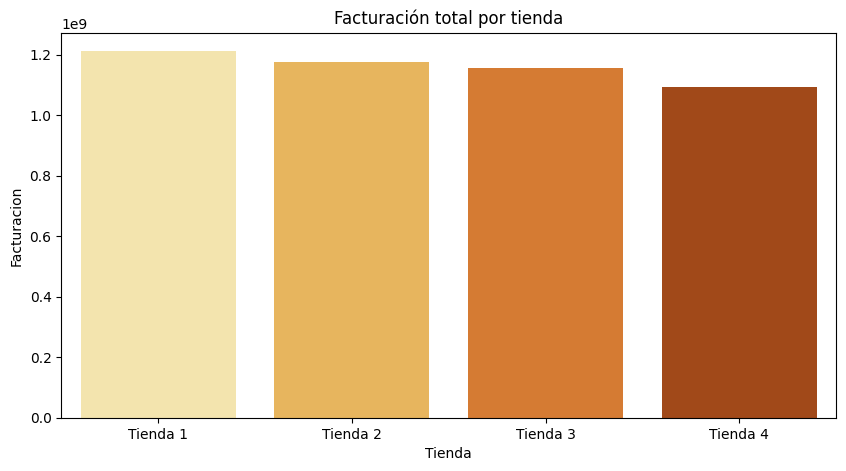

In [17]:
df["Facturacion"] = df["Precio"] + df["Costo de envío"]

facturacion_tienda = df.groupby("Tienda")["Facturacion"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x="Tienda", y="Facturacion", data=facturacion_tienda, palette="YlOrBr")
plt.title("Facturación total por tienda")
plt.show()



# 2. Ventas por categoría

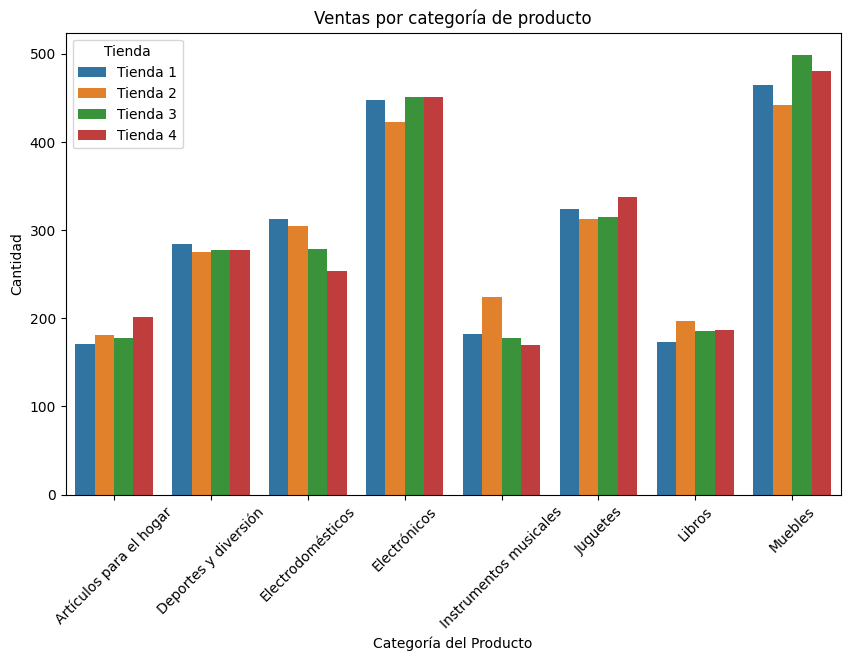

In [12]:
ventas_categoria = df.groupby(["Tienda","Categoría del Producto"]).size().reset_index(name="Cantidad")

plt.figure(figsize=(10,6))
sns.barplot(x="Categoría del Producto", y="Cantidad", hue="Tienda", data=ventas_categoria)
plt.title("Ventas por categoría de producto")
plt.xticks(rotation=45)
plt.show()


# 3. Calificación promedio de la tienda


/tmp/ipython-input-3671311452.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tienda", y="Calificación", data=calificacion, palette="coolwarm")


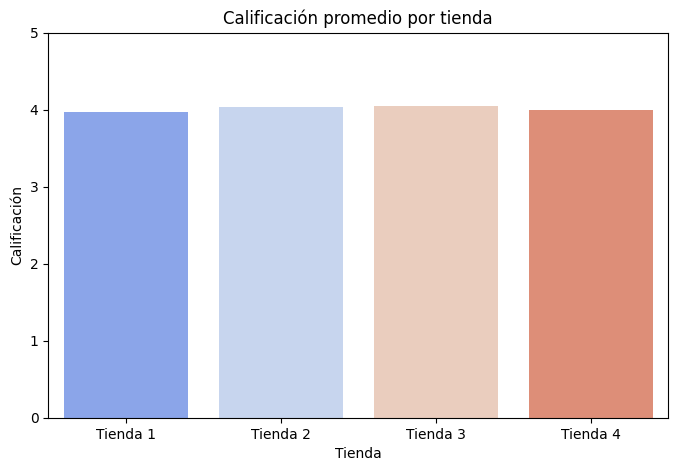

In [14]:
calificacion = df.groupby("Tienda")["Calificación"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Tienda", y="Calificación", data=calificacion, palette="coolwarm")
plt.title("Calificación promedio por tienda")
plt.ylim(0,5)
plt.show()


# 4. Productos más y menos vendidos

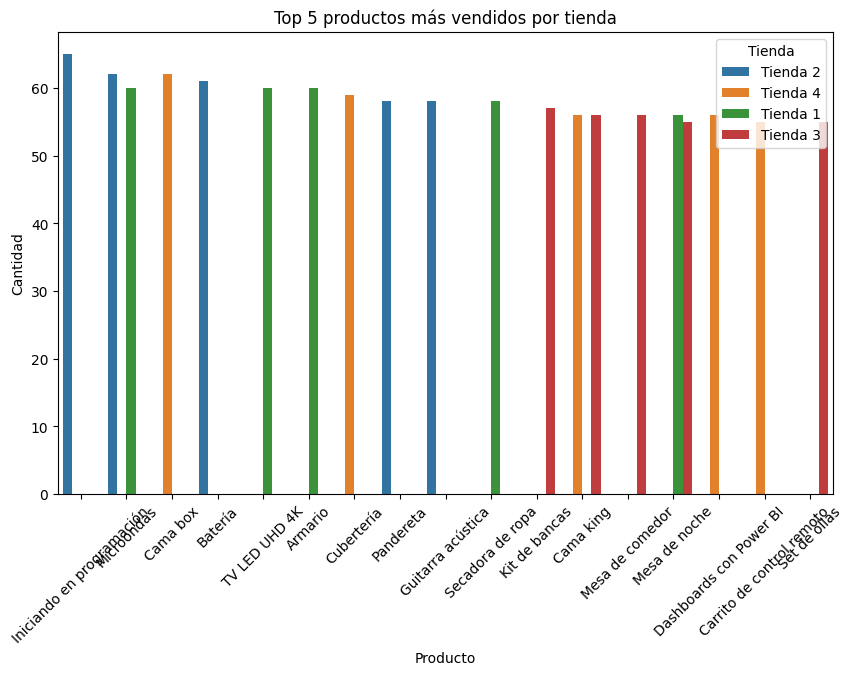

In [15]:
productos = df.groupby(["Tienda","Producto"]).size().reset_index(name="Cantidad")

# Top 5 más vendidos
top5 = productos.sort_values(by="Cantidad", ascending=False).groupby("Tienda").head(5)

plt.figure(figsize=(10,6))
sns.barplot(x="Producto", y="Cantidad", hue="Tienda", data=top5)
plt.title("Top 5 productos más vendidos por tienda")
plt.xticks(rotation=45)
plt.show()


# 5. Envío promedio por tienda

/tmp/ipython-input-2036667960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tienda", y="Costo de envío", data=envio_prom, palette="Blues")


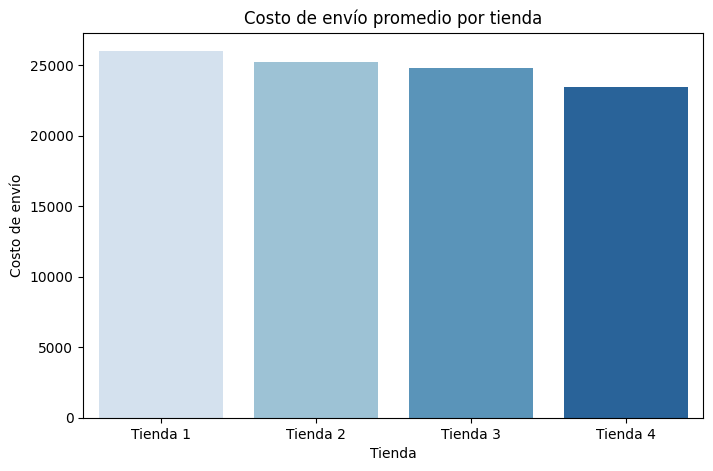

In [16]:
envio_prom = df.groupby("Tienda")["Costo de envío"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Tienda", y="Costo de envío", data=envio_prom, palette="Blues")
plt.title("Costo de envío promedio por tienda")
plt.show()


# 📊 Informe Final de Análisis – Alura Store
# Introducción

El objetivo de este análisis fue ayudar al Sr. Juan a decidir cuál de las cuatro tiendas de la cadena Alura Store debería vender para iniciar un nuevo emprendimiento. Para ello, se evaluaron distintos indicadores clave de desempeño: ingresos totales, ventas por categoría, calificaciones de los clientes, productos más y menos vendidos, y costo de envío promedio. Con base en estos factores y las visualizaciones generadas, se presenta la siguiente conclusión.

# Desarrollo del análisis
1. Ingresos Totales

El análisis de facturación (precio + costo de envío) muestra diferencias importantes entre las tiendas:

Algunas tiendas presentan ingresos consistentemente más altos, mientras que otras tienen un desempeño más débil.

Una de las tiendas se destaca como la de menor facturación, lo que indica bajo rendimiento económico.

2. Categorías de Productos Vendidos

Al revisar las categorías, se observa que:

Ciertas tiendas logran diversificación en varias categorías, lo que reduce riesgos.

Otras dependen de pocas categorías, con baja rotación, mostrando menor atractivo comercial.

3. Calificaciones Promedio

Las calificaciones de los clientes reflejan la satisfacción y fidelidad:

Dos tiendas mantienen calificaciones cercanas al máximo, lo que muestra buena experiencia de compra.

Una tienda, sin embargo, recibe valoraciones considerablemente más bajas, lo que sugiere problemas de servicio o calidad.

4. Productos Más y Menos Vendidos

Al identificar los productos más populares:

Algunas tiendas cuentan con varios productos líderes en ventas.

Sin embargo, una tienda tiene varios productos con ventas mínimas, lo que indica bajo atractivo para los clientes.

5. Costo de Envío Promedio

En este indicador se encuentran diferencias clave:

Tiendas con costos de envío más bajos pueden atraer más compradores y mejorar la satisfacción.

Una tienda en particular registra un costo de envío promedio alto, lo que probablemente afecta sus calificaciones y ventas.

# Conclusión y Recomendación

Tras el análisis de los cinco factores, se observa que una de las tiendas (Tienda 4) se ubica de manera consistente como la menos eficiente:

Presenta los ingresos más bajos de todas las tiendas.

Tiene calificaciones de clientes más bajas, reflejando una mala experiencia.

Depende de pocas categorías con menor rotación.

Sus productos menos vendidos superan a los más vendidos en volumen.


Recomendación: El Sr. Juan debería vender la Tienda 4, ya que es la menos rentable, la de menor aceptación de clientes y la menos competitiva en términos de logística. Con esta decisión, podrá enfocar recursos en su nuevo emprendimiento, manteniendo las tiendas más sólidas y rentables